**<h1><center>CS 464</center></h1>**
**<h1><center>Introduction to Machine Learning</center></h1>**
**<h1><center>Fall 2020</center></h1>**
**<h1><center>Homework 3</center></h1>**
<h4><center>Due: Jan 03, 2021 23:59 (GMT+3)</center></h4>

### Instructions

<ul>
    <li>
    This homework contains both written and programming questions about neural networks. You should implement programming questions on this notebook. Your plots should also be produced in this notebook. Each programming question has its own cell for your answer. You can implement your code directly in these cells, or you can call required functions which are defined in a different location for the given question.
    </li>
    <li>
    For questions that you need to plot, your plot results have to be included in the cell output. For written questions, you may provide them either as comments in code cells or as seperate text cells. 
    </li>
    <li>
    You are <b>NOT ALLOWED</b> to use different libraries than given libraries in the code segments of this homework except for libraries inclueded in Python Standard Library (https://docs.python.org/3/library/).
    </li>
    <li>
    You are <b>NOT ALLOWED</b> to use a different deep learning framework than PyTorch.
    </li>
    <li>
    While submitting the homework file, please package notebook(".ipynb") and model (".pth") files as a gzipped TAR file or a ZIP file with the name cs464_hw3_section#_Firstname_Lastname. Please do not use any Turkish letters for any of your files including code files and model files. Upload your homework to Moodle.
    </li>
    <li>
    This is an individual assignment for each student. That is, you are NOT allowed to share your work with your classmates.</li>
    <li> 
    If you do not follow the submission routes, deadlines and specifications, it will lead to a significant grade deduction.
    </li>
    <li> 
    If you have any questions, please contact "ilaydabeyreli@gmail.com" or "ilayda.beyreli@bilkent.edu.tr".
    </li>

</ul>

## Environment Setup

This homewrok is prepeared by using Google CoLab which already has required libraries. However, if you are using your own local Jupyter or any other Python notebook editor, you may use both anaconda or pip to install PyTorch to your own computer.

### Anaconda Installation

<ul>
    <li>Download anaconda from https://www.anaconda.com/download</li>
    <li>Follow the instructions provided in https://conda.io/docs/user-guide/install/index.html#regular-installation</li>
</ul>

#### Creation of Virtual Environment

<ul>
    <li>Create python3.7 virtual environment for your hw3 using follow command from the command line<br>
        <i>> conda create -n HW3 python=3.7 anaconda</i></li>
    <li>Activate your virtual environment<br>
        <i>> source activate HW3</i></li>
    <li>To install auxiliary libraries, replace the "package_name" in the following command and run it in activated "hw3" environment <br>
        <i>> pip install "pacakge_name"<i></li>
     <li>When you create your virtual environment with "anaconda" metapackage, jupyter notebook should be installed. Try:<br>
         <i>> jupyter notebook</i>
</ul>


#### Pytorch Installation with Anaconda

You should install PyTorch to your virtual environment which is created for the hw3. Therefore, you should activate your homework virtual environment before to start PyTorch installation.
<li>> source activate HW3</li>

After you have activated the virtual environment, then use one of the following commands to install pytorch for CPU for your system. See https://pytorch.org/ for help.
<ul>
<li>For MacOS:<br>
    <i>> conda install pytorch torchvision -c pytorch</i>
</li>
<li>For Linux:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i>
</li>
<li>For Windows:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i><br>
</li>

###Pip3 Installation
<ul>
    <li>Download pip3 from https://pip.pypa.io/en/stable/installing/</li>
    <li>If you are using Windows, you may need to add Python to your enviroment variables. You may use the following tutorial to install Python and pip.
    https://phoenixnap.com/kb/how-to-install-python-3-windows</li>
</ul>

#### PyTorch Installation with Pip
<ul>
<li>For MacOS:<br>
    <i>> pip3 install torch torchvision</i>
</li>
<li>For Linux:<br>
    <i>> pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html</i>
</li>
<li>For Windows:<br>
    <i>> pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html</i><br>
</li>


##Question 1 [12 pts.]

Answer the given questions with **at most a sentence**.

  >a) What is one reason not to use the same data for both your training set and your testing set?<br>
    To make an unbiased evaluation of a final model with testing it over not encountered data.
    <br>
    
  >b) Why is it important for machine learning algorithms to have access to high-quality(large and accurate enough) data? <br>
  Large and accurate data is needed to learn pattern of the model and small errors in the large data can create large scale errors for the system's output.<br>
  
  >c) What is the main motivation for using activation functions in artificial neural networks (ANNs)?<br>
     Being able to calculate weighted sum of the inputs and making the output not the linear combination of the input.<br>
     
  >d) The activations for class A, B and C before softmax were 12, 7 and 4. What would be the softmax values for class A and class B?<br>

  >e) What does it mean to underfit your data model?<br>
  It means our model does not learn enough patterns to capture certain patterns.<br>
  
  >f) Consider you have a 14 class classification problem. What would be the probability of random guess?<br>
  0.07 % is probability for random guess. Without any observation all of the cases have same probability.



##Question 2 [88 pts.]

Computer vision (CV) is the field of study that deals with how computers can gain high-level understanding from digital images or videos. Your task for this question is to classify cats according to their breeds by using simple machine learning algorithms developed for CV problems on cat images.

Your dataset consist of cat images from 13 breeds. Images of each breed is stored under separate folders in the compressed file given to you.  The dataset has been processed in such a way that each class has approximately 1900 samples.

Download the dataset from the following link:
<br>
https://drive.google.com/.....
<br>

Libraries that are required in this question is given in the following code cell.

In [7]:
# Mount Google Drive
#from google.colab import drive
#drive.mount('/content/drive')
# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
# To Read Data
from torch.utils.data import Dataset, DataLoader
import numpy as np
from PIL import Image
# To Interpret results & obtain plots
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

import time
import os
# You could add your own libraries form Python Standard Library in this cell. Any other external libraries are not allowed.

### Data Loader [8 pts.]

An important part of such a task is to implement your own data loader. In this homework, a partial loader is provided to you. This loader is going to be based on a base class named "Dataset", provided in PyTorch library. You need to complete the code below to create your custom "CatsDataset" class which will be able to load your dataset. Implement the functions whose proptotypes are given. Follow the TODO notes below. You have to divide the files into three sets as <b>train (70%)</b>, 
<b>validation (10%)</b> and **test (20%)** sets.  These non-overlapping splits, which are subsets of CatsDataset, should be retrieved using the "get_dataset" function. Since this data loader will be called to get the input for different models, your function should work in a least two modes:
1. To be compatible with MLP, you need to resize the image to 64x64x3 to have consistent input size for all images. Then, you should convert your image to grayscale and flatten it into a vector. Note that the pixel values also needs to be normalized to [0,1] range.
<br>
2. To be compatible with CNN, you need to resize the image to 64x64x3 to have consistent input size for all images. Note that, you **should not** flatten the image or convert it to grayscale in this mode, i.e. all channels of the images should be included and each image should be stored as a matrix.

Hint: The dataset is not normalized and your results will heavily depend on your input.

In [8]:
def normalize_image(image):
    pixels = np.asarray(image)
    pixels = pixels.astype('float32')
    pixels /= 255.0
    return pixels

class CatsDataset(Dataset):
    # TODO:
    # Define constructor for SVHNDataset class
    # HINT: You can pass processed data samples and their ground truth values as parameters 
    
    #img dimensions np.empty((15, 2000, 64, 64, 3), dtype=int)

    def __init__(self, mode, option, all_cats, labels): # you are free to change parameters
        super().__init__()
        train_ratio = 0.7
        validation_ratio = 0.1
        test_ratio = 0.2
        self.data = all_cats
        self.labels = labels
        label_sizes = []
        label_names = []
        size = 0
        self.mode = mode

        for i in range(len(labels)):
            label_sizes.append(int(labels[i][1]))
            label_names.append(labels[i][0])
            size += int(labels[i][1])
        self.size = size
        
        #print("Total size is: " + str(self.size))
        
        rgb_weights = [0.2989, 0.5870, 0.1140]
        total_image_index = 0
        train_list = []
        validate_list = []
        test_list = []
        label_dict = {}
        if mode == 1:
            new_data = np.zeros((self.size, 4096), dtype=float)
        elif mode == 2:
            new_data2 = np.zeros((self.size, 3, 64, 64), dtype=float)
        else:
            print("Error")
            return
        
        print("Mode is: " + str(mode))
        for i in range(len(label_sizes)):
            #print("Label size is: " + str(label_sizes[i]))
            
            #Find Separation for each label
            train_data_count = label_sizes[i] * train_ratio
            valid_data_count = label_sizes[i] * validation_ratio
            test_data_count = label_sizes[i] - train_data_count - valid_data_count
            
            for j in range(label_sizes[i]):
                if option == 'train':
                   if j < train_data_count:
                       img = self.data[i, j, :, : , :]
                       if mode == 1:
                           grayscale_image = np.dot(img[...,:3], rgb_weights)
                           flattened_image = grayscale_image.flatten()
                           flattened_image = normalize_image(flattened_image)
                           new_data[total_image_index] = flattened_image
                           train_list.append(new_data[total_image_index])
                       elif mode == 2:
                            new_data2[total_image_index] = img.reshape(3, 64, 64)
                            train_list.append(new_data2[total_image_index])
                       
                       label_dict[str(total_image_index)] = i
                       total_image_index += 1
                       
                   elif j < train_data_count + valid_data_count:
                       validate_list.append(0)
                   else:
                       test_list.append(0)
                       
                elif option == 'validate':
                   if j < train_data_count:
                       train_list.append(0)
                   elif j < train_data_count + valid_data_count:
                       img = self.data[i, j, :, : , :]
                       if mode == 1:
                           grayscale_image = np.dot(img[...,:3], rgb_weights)
                           flattened_image = grayscale_image.flatten()
                           flattened_image = normalize_image(flattened_image)
                           new_data[total_image_index] = flattened_image
                           validate_list.append(new_data[total_image_index])
                           
                       elif mode == 2:
                            new_data2[total_image_index] = img.reshape(3, 64, 64)
                            validate_list.append(new_data2[total_image_index])
                          
                       
                       label_dict[str(total_image_index)] = i
                       total_image_index += 1
                   else:
                       test_list.append(0)
                       
                elif option == 'test':
                     if j < train_data_count:
                        train_list.append(0)
                     elif j < train_data_count + valid_data_count:
                        validate_list.append(0)
                     else:
                        img = self.data[i, j, :, : , :]
                        if mode == 1:
                            grayscale_image = np.dot(img[...,:3], rgb_weights)
                            flattened_image = grayscale_image.flatten()
                            flattened_image = normalize_image(flattened_image)
                            new_data[total_image_index] = flattened_image
                            test_list.append(new_data[total_image_index])
                        
                        elif mode == 2:
                            new_data2[total_image_index] = img.reshape(3, 64, 64)
                            test_list.append(new_data2[total_image_index])
                        
                        label_dict[str(total_image_index)] = i
                        total_image_index += 1
        
        if option == 'train':
            train_list = np.array(train_list, dtype=float)
            self.loader_data = torch.from_numpy(train_list)
        elif option == 'validate':
            validate_list = np.array(validate_list, dtype=float)
            self.loader_data = torch.from_numpy(validate_list)
        elif option == 'test':
            test_list = np.array(test_list, dtype=float)
            self.loader_data = torch.from_numpy(test_list)
            
        self.size = total_image_index
        #self.all_data =  torch.from_numpy(new_data)
        
        print("Length of loader data is: " + str(len(self.loader_data)))
        self.label_dict = label_dict

        
    '''This function should return sample count in the dataset'''
    
    def __len__(self):
        return len(self.loader_data)

    '''This function should return a single sample and its ground truth value from the dataset corresponding to index parameter '''
    def __getitem__(self, index):
        x = self.loader_data[index]
        y = self.label_dict[str(index)]
        return x, y

In [9]:
def get_dataset(root, mode):
    # TODO: 
    # Read dataset files
    # Resize images as 64x64 so that you have consistent data. You can use img.resize((64,64)) from PIL.Image.
    # Construct training, validation and test sets
    # Normalize datasets
    start = time.time()
    result = os.path.isfile('dataset.npy')
    result2 = os.path.isfile('labels.npy')
    files_path = './' + root

    if mode == 1 or mode == 2:
        if result == True and result2 == True:
            all_cats = np.load('dataset.npy')
            labels = np.load('labels.npy')
        else:
          files = os.listdir(files_path)
          all_cats = np.empty((13, 2000, 64, 64, 3), dtype=float)
          labels = [] 
          total_length = 0
          for f in range(len(files)):
            cats = os.listdir(files_path + files[f] + '/')
            total_length = total_length + len(cats)
            labels.append((files[f], len(cats)))
            for i in range(len(cats)):
              img = Image.open(files_path + files[f] + '/' + cats[i])
              img = img.resize((64, 64))
              img = np.array(img, dtype=int)
              all_cats[f][i] = img      
          rows = len(all_cats)
          column = len(all_cats[0])
    
          print("Row count is: " + str(rows) + " Column count is: " + str(column))
          print("Total image size is: " + str(total_length))
          print("First label is: " + str(labels[0][0]))
          np.save('dataset.npy', all_cats)
          np.save('labels.npy', labels)
          print(all_cats.nbytes)
    else:
        print("invalid mode termination.")
        return None
            
    end = time.time()
    print("Execution Time is: " + str(end - start) + str(" seconds."))
    
    print(labels)
    option = 'train'
    train_loader = CatsDataset(mode, option, all_cats, labels)
    option = 'validate'
    validate_loader = CatsDataset(mode, option, all_cats, labels)
    option = 'test'
    test_loader = CatsDataset(mode, option, all_cats, labels)
    
    return train_loader, validate_loader, test_loader

###Model Implementations [10 pts.]

#### Multi Layer Perceptron [5 pts.]
Now, implement your three layer neural network. (Input+hidden1+hidden2) FNet class will represent your neural network. The first hidden layer will contain 2048 neurons, and the second will have 1024 neurons. You will decide the number of input and output neurons. Use ReLU as your hidden layer activation function. You need to pick a proper activation function for the output layer.

In [10]:
class FNet(nn.Module):
    '''Define your neural network'''
    def __init__(self): 
      super().__init__()
      # Defining the layers, 2048, 1024, 15 units each
      self.fc1 = nn.Linear(4096, 2048)
      self.fc2 = nn.Linear(2048, 1024)
      # Output layer, 10 units - one for each digit
      self.fc3 = nn.Linear(1024, 13)

      # Define sigmoid activation and softmax output 
      self.softmax = nn.Softmax(dim=1)
        
    def forward(self, X):  
      # you can add any additional parameters you want
      # TODO:
      # Forward propagation implementation should be here
      X = F.relu(self.fc1(X))
      X = F.relu(self.fc2(X))
      X = self.fc3(X)
      return self.softmax(X)

#### Convolutional Neural Network [5 pts]

Now implement your CNN. ConvNet class will represent your convolutional neural network. Implement 4 layers of convolution: 
<ul>
    <li>(1) 8 filters with size of 3 x 3 with stride 1 and no padding, (2) ReLU </li>
    <li>(3) 16 filters with size of 3 x 3 with stride 1 and no padding, (4) ReLU and (5) MaxPool 2 x 2 </li>
    <li>(6) 32 filters with size of 5 x 5 with stride 1 and padding 1, (7) ReLU and (8) MaxPool 2 x 2 </li> 
    <li>(9) 32 filters with size of 5 x 5 with stride 1 and padding 1, (10) ReLU and (11) MaxPool 2 x 2 </li> 
</ul>

As the classifier layer, you need to add only one linear layer at the end of the network. You need to choose the appropriate input and output neuron sizes and the activation function for the dense layer.

In [11]:
class ConvNet(nn.Module):
    '''Define your neural network'''
    def __init__(self, **kwargs): # you can add any additional parameters you want 
      super(ConvNet, self).__init__()
      self.conv1 = nn.Conv2d(3, 8, (3, 3), stride=(1))
      self.conv2 = nn.Conv2d(8, 16, (3, 3), stride=(1))
      self.conv3 = nn.Conv2d(16, 32, (3, 3), stride=(1), padding=(1))
      self.conv4 = nn.Conv2d(32, 32, (3, 3), stride=(1), padding=(1))
      # TODO:
      # You should create your neural network here
      self.fc1 = nn.Linear(1568, 13)
      self.softmax = nn.Softmax(dim=1) 

    def forward(self, X): # you can add any additional parameters you want
      # TODO:
      # Forward propagation implementation should be here
      X = F.relu(self.conv1(X))
      X = F.max_pool2d(F.relu(self.conv2(X)), (2, 2))
      X = F.max_pool2d(F.relu(self.conv3(X)), (2, 2))
      X = F.max_pool2d(F.relu(self.conv4(X)), (2, 2))
      X = X.view(X.shape[0], -1)
      #print(X.shape)
      X = self.fc1(X)
      return self.softmax(X)

###Stochastic Gradient Descent [35 pts.]

####Training with SGD [20 pts.]

Train both models up to 700 epochs with properly processed inputs, i.e. call your "get_dataset" function in mode "1" for MLP and mode "2" for CNN. Use SGD as your optimizer. Tune your learning rate, weight decay. Take momentum as $0$ Save your best models, i.e. MLP and CNN models with highest performance, as "best_mlp_sgd.pth" and "best_cnn_sgd.pth". The best model decision is up to you. You could use any measurement and/or metric to decide on the best model for each network. However, you must explain your reasoning in your choice.

During training, you need to plot two figures for each model:
1. training loss and validation loss vs. epoch
2. validation acuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

Execution Time is: 0.8588242530822754 seconds.
[['American Shorthair' '1896']
 ['Bengal' '1896']
 ['Calico' '1897']
 ['Dilute Calico' '1885']
 ['Dilute Tortoiseshell' '1876']
 ['Domestic Medium Hair' '1870']
 ['Manx' '1882']
 ['Persian' '1892']
 ['Ragdoll' '1894']
 ['Siamese' '1888']
 ['Tabby' '1888']
 ['Torbie' '1868']
 ['Tuxedo' '1891']]
Mode is: 1
Length of loader data is: 17172
Mode is: 1
Length of loader data is: 2451
Mode is: 1
Length of loader data is: 4900
Epoch: 0 Training Loss: 2.5647307280863245 Validation Loss: 2.5645068179145727
Training Accuracy: 8.146983461535646% Validation Accuracy: 8.32313341493268%

Epoch: 1 Training Loss: 2.564244439711305 Validation Loss: 2.5640429951423824
Training Accuracy: 8.071278826690016% Validation Accuracy: 7.996736026719755%

Epoch: 2 Training Loss: 2.5637189545554766 Validation Loss: 2.5635222644525757
Training Accuracy: 8.176100629017593% Validation Accuracy: 7.91513667921055%

Epoch: 3 Training Loss: 2.563102084385774 Validation Loss: 2

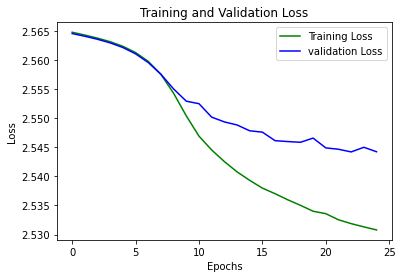

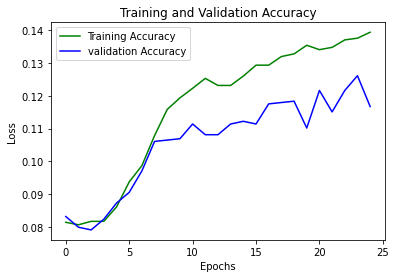

In [19]:
# HINT: note that your training time should not take many days.

# Pick your hyper parameters
max_epoch = 700
train_batch = 32
test_batch = 8
learning_rate = 0.01
train_on_gpu = torch.cuda.is_available()
save_file_name_fnet = 'fnet.pt'

# Create train dataset loader
# Create validation dataset loader
# Create test dataset loader
train_load, validate_load, test_load = get_dataset("data/", 1)
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
# initialize your network
model = FNet() 

if train_on_gpu:
    model = model.to('cuda')
    
# define your loss function
criterion = nn.CrossEntropyLoss()    
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=5e-04) # you can play with  weight_decay as well
results = []    

# Dataloader iterators
dataloadersF = {
    'train': DataLoader(train_load, batch_size=train_batch, shuffle=True),
    'val': DataLoader(validate_load, batch_size=32, shuffle=True),
    'test': DataLoader(test_load, batch_size=test_batch, shuffle=True)
} 


# Validation Control Variables
best_epoch1 = 0
total_epoch = 0
no_improvement_stop = 2
train_loader = dataloadersF['train']
valid_loader = dataloadersF['val']
# Early stopping intialization
no_improve = 0
valid_loss_min = np.Inf
valid_max_acc = 0

# Main loop
for epoch in range(max_epoch):
    
    #Training Data
    train_loss = 0.0
    valid_loss = 0.0
    train_acc = 0
    valid_acc = 0

    model.train()

    # Train loop
    for data, target in train_loader:
        # Tensors to gpu
        data = data.float()
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        
        
        optimizer.zero_grad() #clear the optimizer on each iteration
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        # Track train loss by multiplying average loss by number of examples in batch
        train_loss += loss.item() * data.size(0)

        # Calculate accuracy by finding max log probability
        _, pred = torch.max(output, dim=1)
        correct_tensor = pred.eq(target.data.view_as(pred))
        # Need to convert correct tensor from int to float to average
        accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
        # Multiply average accuracy times the number of examples in batch
        train_acc += accuracy.item() * data.size(0)

    # After training loops ends, start validation
    else:

        # Don't need to keep track of gradients
        with torch.no_grad():
            # Set to evaluation mode
            model.eval()

            # Validation loop
            for data, target in valid_loader:
                data = data.float()
                # Tensors to gpu
                if train_on_gpu:
                    data, target = data.cuda(), target.cuda()

                # Forward pass
                output = model(data)

                # Validation loss
                loss = criterion(output, target)
                # Multiply average loss times the number of examples in batch
                valid_loss += loss.item() * data.size(0)

                # Calculate validation accuracy
                _, pred = torch.max(output, dim=1)
                correct_tensor = pred.eq(target.data.view_as(pred))
                accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
                # Multiply average accuracy times the number of examples
                valid_acc += accuracy.item() * data.size(0)
                
            valid_loss = valid_loss / len(valid_loader.dataset)

            results.append([train_loss / len(train_loader.dataset), valid_loss, train_acc / len(train_loader.dataset), valid_acc / len(valid_loader.dataset)])
            print('Epoch: ' + str(epoch) + ' Training Loss: ' + str(results[epoch][0]) + ' Validation Loss: ' + str(results[epoch][1]))
            print('Training Accuracy: ' + str(100 * results[epoch][2]) + '% Validation Accuracy: ' + str(100 * results[epoch][3]) + '%')
            print('')

            if valid_loss < valid_loss_min:
                # Save model
                torch.save(model.state_dict(), save_file_name_fnet)
                no_improve = 0
                valid_loss_min = valid_loss
                valid_best_acc = valid_acc
                best_epoch = epoch
            else:
                no_improve += 1
                if no_improve >= no_improvement_stop:
                    print("No increment in validation thus stop")
                    model.load_state_dict(torch.load(save_file_name_fnet))
                    break
                    
total_epoch = epoch
best_epoch1 = best_epoch
# Attach the optimizer
model.optimizer = optimizer

# plot losses vs epoch 
train_loss = np.zeros((len(results)), dtype=float)
valid_loss = np.zeros((len(results)), dtype=float)
train_acc = np.zeros((len(results)), dtype=float)
valid_acc = np.zeros((len(results)), dtype=float)
for i in range(len(results)):
    train_loss[i] = results[i][0]
    valid_loss[i] = results[i][1]
    train_acc[i] = results[i][2]
    valid_acc[i] = results[i][3]
epochs = range(0, epoch + 1)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, valid_loss, 'b', label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# plot accuracies vs epoch
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, valid_acc, 'b', label='validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Execution Time is: 0.7547430992126465 seconds.
[['American Shorthair' '1896']
 ['Bengal' '1896']
 ['Calico' '1897']
 ['Dilute Calico' '1885']
 ['Dilute Tortoiseshell' '1876']
 ['Domestic Medium Hair' '1870']
 ['Manx' '1882']
 ['Persian' '1892']
 ['Ragdoll' '1894']
 ['Siamese' '1888']
 ['Tabby' '1888']
 ['Torbie' '1868']
 ['Tuxedo' '1891']]
Mode is: 2
Length of loader data is: 17172
Mode is: 2
Length of loader data is: 2451
Mode is: 2
Length of loader data is: 4900
Epoch: 0 Training Loss: 2.554589040846417 Validation Loss: 2.5510140100531267
Training Accuracy: 10.930584672809813% Validation Accuracy: 10.526315790081647%

Epoch: 1 Training Loss: 2.5354251225678315 Validation Loss: 2.5356386737986907
Training Accuracy: 13.242487771483866% Validation Accuracy: 12.688698485548377%

Epoch: 2 Training Loss: 2.52938424988335 Validation Loss: 2.5373568173964527
Training Accuracy: 14.121826229091571% Validation Accuracy: 13.219094242382322%

Epoch: 3 Training Loss: 2.524831475618417 Validation L

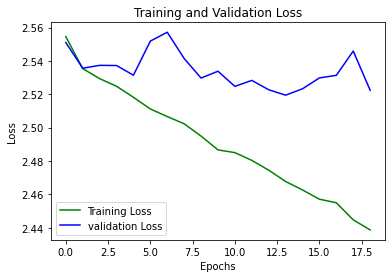

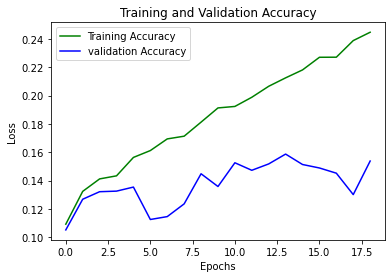

In [20]:
# HINT: note that your training time should not take many days.

# TODO:
# Pick your hyper parameters
max_epoch = 700
train_batch = 32
test_batch = 8
learning_rate = 0.01
model = ConvNet()
criterion = nn.CrossEntropyLoss()    
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=5e-04) # you can play with  weight_decay as well
train_on_gpu = torch.cuda.is_available()

save_file_name = 'convnet.pt'
# Create train dataset loader
# Create validation dataset loader
# Create test dataset loader
train_loader, validate_loader, test_loader = get_dataset("data/", 2)

# initialize your network
dataloadersE = {
    'train': DataLoader(train_loader, batch_size=train_batch, shuffle=True),
    'val': DataLoader(validate_loader, batch_size=32, shuffle=True),
    'test': DataLoader(test_loader, batch_size=test_batch, shuffle=True)
}

if train_on_gpu:
    model = model.to('cuda')

no_improvement_stop = 5
train_loader = dataloadersE['train']
valid_loader = dataloadersE['val']
# Early stopping intialization
no_improve = 0
valid_loss_min = np.Inf
best_epoch2 = 0
valid_max_acc = 0
results = []

# Main loop
for epoch in range(max_epoch):

    # keep track of training and validation loss each epoch
    train_loss = 0.0
    valid_loss = 0.0

    train_acc = 0
    valid_acc = 0

    # Set to training
    model.train()

    # Training loop
    for data, target in train_loader:
        # Tensors to gpu
        data = data.float()
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()

        # Clear gradients
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * data.size(0)


        _, pred = torch.max(output, dim=1)
        correct_tensor = pred.eq(target.data.view_as(pred))
        accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
        train_acc += accuracy.item() * data.size(0)

    # After training loops ends, start validation
    else:

        with torch.no_grad():
            model.eval()

            for data, target in valid_loader:
                data = data.float()
                # Tensors to gpu
                if train_on_gpu:
                    data, target = data.cuda(), target.cuda()

                # Forward pass
                output = model(data)


                loss = criterion(output, target)
                valid_loss += loss.item() * data.size(0)

                _, pred = torch.max(output, dim=1)
                correct_tensor = pred.eq(target.data.view_as(pred))
                accuracy = torch.mean(
                    correct_tensor.type(torch.FloatTensor))
                valid_acc += accuracy.item() * data.size(0)


            valid_loss = valid_loss / len(valid_loader.dataset)

            results.append([train_loss / len(train_loader.dataset), valid_loss, train_acc / len(train_loader.dataset), valid_acc / len(valid_loader.dataset)])

            # Print training and validation results

            print('Epoch: ' + str(epoch) + ' Training Loss: ' + str(results[epoch][0]) + ' Validation Loss: ' + str(results[epoch][1]))
            print('Training Accuracy: ' + str(100 * results[epoch][2]) + '% Validation Accuracy: ' + str(100 * results[epoch][3]) + '%')
            print('')

            # Save the model if validation loss decreases
            if valid_loss < valid_loss_min:
                torch.save(model.state_dict(), save_file_name)
                no_improve = 0
                valid_loss_min = valid_loss
                valid_best_acc = valid_acc
                best_epoch = epoch

            else:
                no_improve += 1
                if no_improve >= no_improvement_stop:
                    print("No increment in validation thus stop")
                    model.load_state_dict(torch.load(save_file_name))
                    break


# Attach the optimizer
model.optimizer = optimizer
best_epoch2 = best_epoch

# plot losses vs epoch 
train_loss = np.zeros((len(results)), dtype=float)
valid_loss = np.zeros((len(results)), dtype=float)
train_acc = np.zeros((len(results)), dtype=float)
valid_acc = np.zeros((len(results)), dtype=float)
for i in range(len(results)):
    train_loss[i] = results[i][0]
    valid_loss[i] = results[i][1]
    train_acc[i] = results[i][2]
    valid_acc[i] = results[i][3]
epochs = range(0, epoch + 1)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, valid_loss, 'b', label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# plot accuracies vs epoch
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, valid_acc, 'b', label='validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

####Test with SGD [15 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Then, discuss figures that you have plotted in the previous section, your test results and algorithm complexity with maximum 200 words. Compare two **models**. Which one is more preferable? Why?

**Explanation** <br>
Convolutional Network examines image with channels and applies several feature extraction methods. Therefore, ConvNet is more successfull over the image classification task. Full connected networks are indeed appropriate for classification. But color channels include imporant features and CNN can learn these patterns. Because FNet takes gray scale 1D image therefore, many pattern lost. Also, convolutional networks can train filter parameters. After these differences of the CNN and FCNN, we can see the reason why CNN is more successfull.

In [36]:
# Test MLP
# load best model

best_path = save_file_name_fnet
test_loader2 = dataloadersF['test'] 


test_loss = 0
accuracy = 0

model = FNet()
model.load_state_dict(torch.load(save_file_name_fnet))
model.eval()

if train_on_gpu:
    model = model.to('cuda')

test_loss = 0
accuracy = 0
acc = []
# with torch.no_grad():
with torch.no_grad():
    iteration = 0
    for inputs, labels in test_loader2:
        if train_on_gpu:
            inputs, labels = data.cuda(), target.cuda()
        logps = model(inputs)
        test_loss += criterion(logps, labels)

        # Calculate accuracy
        ps = torch.exp(logps)
        top_p, top_class = ps.topk(1, dim=1)
        #print(top_p)
        #print(len(test_loader.dataset))
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
        acc.append(torch.mean(equals.type(torch.FloatTensor)).item())
        iteration += 1
        #print(accuracy)
print(f"Test loss: {test_loss/iteration:.3f}.. ")
print("Test Accuracy:" + str(100 * accuracy / iteration) + ' %')


#   get confusion matrix
#   calculate accuracy
#   calculate precision
#   calculate recall
#   calculate F1 score

# print metrics
# print("Mean Loss:", losses, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
# fig, ax = plt.subplots()
# im = ax.imshow(conf_matrix)
# We want to show all ticks...
# ax.set_xticks(np.arange(15))
# ax.set_yticks(np.arange(15))

# fig.tight_layout()
# plt.show()

Enters 


RuntimeError: mat1 dim 1 must match mat2 dim 0

In [38]:
# Test MLP
# load best model
save_file_name = 'convnet.pt'

best_path = save_file_name
test_loader = dataloadersE['test'] 
test_loss = 0
accuracy = 0


    
model = ConvNet()
model.load_state_dict(torch.load(save_file_name_fnet))
model.eval()

if train_on_gpu:
    model = model.to('cuda')

test_loss = 0
accuracy = 0
acc = []
# with torch.no_grad():
with torch.no_grad():
    print("Enters ")
    iteration = 0
    #   iterate over test batches
    for inputs, labels in test_loader:
        if train_on_gpu:
            inputs, labels = data.cuda(), target.cuda()
        logps = model(inputs)
        test_loss += criterion(logps, labels)

        # Calculate accuracy
        ps = torch.exp(logps)
        top_p, top_class = ps.topk(1, dim=1)
        #print(top_p)
        #print(len(test_loader.dataset))
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
        acc.append(torch.mean(equals.type(torch.FloatTensor)).item())
        iteration += 1
        #print(accuracy)
print(f"Test loss: {test_loss/iteration:.3f}.. ")
print("Test Accuracy:" + str(100 * accuracy / iteration) + ' %')

#   get confusion matrix
#   calculate accuracy
#   calculate precision
#   calculate recall
#   calculate F1 score

# print metrics
# print("Mean Loss:", losses, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
# fig, ax = plt.subplots()
# im = ax.imshow(conf_matrix)
# We want to show all ticks...
# ax.set_xticks(np.arange(15))
# ax.set_yticks(np.arange(15))

# fig.tight_layout()
# plt.show()

RuntimeError: Error(s) in loading state_dict for ConvNet:
	Missing key(s) in state_dict: "conv1.weight", "conv1.bias", "conv2.weight", "conv2.bias", "conv3.weight", "conv3.bias", "conv4.weight", "conv4.bias". 
	Unexpected key(s) in state_dict: "fc2.weight", "fc2.bias", "fc3.weight", "fc3.bias". 
	size mismatch for fc1.weight: copying a param with shape torch.Size([2048, 4096]) from checkpoint, the shape in current model is torch.Size([13, 1568]).
	size mismatch for fc1.bias: copying a param with shape torch.Size([2048]) from checkpoint, the shape in current model is torch.Size([13]).

###Adam Optimizer [35 pts.]

Adam is an adaptive learning rate optimization algorithm that has been designed specifically for training deep neural networks. It was presented by Diederik Kingma from OpenAI and Jimmy Ba from the University of Toronto in their 2015 ICLR paper (poster) titled “Adam: A Method for Stochastic Optimization“.

Nowadays, most of machine learning frameworks, including tensorflow, Pytorch, and Keras, choose Adam as the default optimizer. In this question, you will experiment with it and try to understand why it replaced SGD as the default optimizer.

####Training with ADAM [20 pts.]

Train both models up to 700 epochs with properly processed inputs, i.e. call your "get_dataset" function in mode "1" for MLP and mode "2" for CNN. This time use Adam Optimizer as your optimizer. Tune your learning rate, weight decay. Save your best models, i.e. MLP and CNN models with highest performance, as "best_mlp_adam.pth" and "best_cnn_adam.pth". The best model decision is up to you. You could use any measurement and/or metric to decide on the best model for each network. However, you must explain your reasoning in your choice.

During training, you need to plot two figures for each model:
1. training loss and validation loss vs. epoch
2. validation acuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

Execution Time is: 2.2120001316070557 seconds.
[['American Shorthair' '1896']
 ['Bengal' '1896']
 ['Calico' '1897']
 ['Dilute Calico' '1885']
 ['Dilute Tortoiseshell' '1876']
 ['Domestic Medium Hair' '1870']
 ['Manx' '1882']
 ['Persian' '1892']
 ['Ragdoll' '1894']
 ['Siamese' '1888']
 ['Tabby' '1888']
 ['Torbie' '1868']
 ['Tuxedo' '1891']]
Mode is: 1
Length of loader data is: 17172
Mode is: 1
Length of loader data is: 2451
Mode is: 1
Length of loader data is: 4900
Epoch: 0 Training Loss: 2.549159684993158 Validation Loss: 2.5453659244966915
Training Accuracy: 11.18681574665095% Validation Accuracy: 10.730314158094703%

Epoch: 1 Training Loss: 2.538796247537392 Validation Loss: 2.5447942644467116
Training Accuracy: 12.170976007627548% Validation Accuracy: 11.423908609339092%

Epoch: 2 Training Loss: 2.5355639793699005 Validation Loss: 2.546396449165702
Training Accuracy: 12.695085022823255% Validation Accuracy: 11.791105671762594%

Epoch: 3 Training Loss: 2.532690659897771 Validation Lo

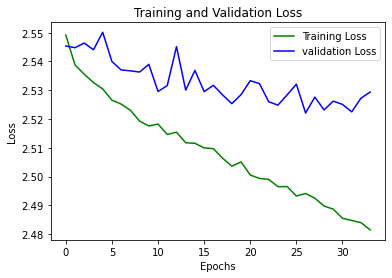

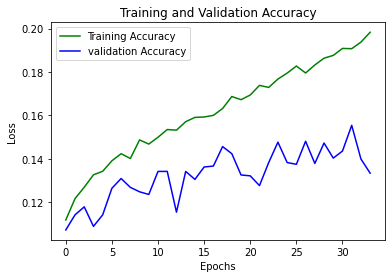

In [21]:
# HINT: note that your training time should not take many days.

# TODO:
# Pick your hyper parameters
max_epoch = 700

train_batch = 32
test_batch = 8

learning_rate = 0.001

train_on_gpu = torch.cuda.is_available()

save_file_name = 'fnet.pt'

# Create train dataset loader
# Create validation dataset loader
# Create test dataset loader

train_load, validate_load, test_load = get_dataset("data/", 1)
learning_rate = 0.0001
criterion = nn.CrossEntropyLoss()

# initialize your network
model = FNet() 
if train_on_gpu:
    model = model.to('cuda')
    
# define your loss function
criterion = nn.CrossEntropyLoss()    
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=5e-04) # you can play with  weight_decay as well

results = []    

# Dataloader iterators
dataloadersF = {
    'train': DataLoader(train_load, batch_size=train_batch, shuffle=True),
    'val': DataLoader(validate_load, batch_size=32, shuffle=True),
    'test': DataLoader(test_load, batch_size=test_batch, shuffle=True)
} 


# Validation Control Variables
no_improvement_stop = 7
train_loader = dataloadersF['train']
valid_loader = dataloadersF['val']
# Early stopping intialization
no_improve = 0
valid_loss_min = np.Inf
best_epoch3 = 0
valid_max_acc = 0
results = []

# Main loop
for epoch in range(max_epoch):

    # keep track of training and validation loss each epoch
    train_loss = 0.0
    valid_loss = 0.0

    train_acc = 0
    valid_acc = 0

    model.train()

    # Training loop
    for data, target in train_loader:
        data = data.float()
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * data.size(0)
        _, pred = torch.max(output, dim=1)
        correct_tensor = pred.eq(target.data.view_as(pred))
        accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
        train_acc += accuracy.item() * data.size(0)

    # After training loops ends, start validation
    else:

        with torch.no_grad():
            model.eval()

            # Validation loop
            for data, target in valid_loader:
                data = data.float()
                # Tensors to gpu
                if train_on_gpu:
                    data, target = data.cuda(), target.cuda()

                output = model(data)

                loss = criterion(output, target)
                valid_loss += loss.item() * data.size(0)

                # Calculate validation accuracy
                _, pred = torch.max(output, dim=1)
                correct_tensor = pred.eq(target.data.view_as(pred))
                accuracy = torch.mean(
                    correct_tensor.type(torch.FloatTensor))
                valid_acc += accuracy.item() * data.size(0)

            valid_loss = valid_loss / len(valid_loader.dataset)

            results.append([train_loss / len(train_loader.dataset), valid_loss, train_acc / len(train_loader.dataset), valid_acc / len(valid_loader.dataset)])

            print('Epoch: ' + str(epoch) + ' Training Loss: ' + str(results[epoch][0]) + ' Validation Loss: ' + str(results[epoch][1]))
            print('Training Accuracy: ' + str(100 * results[epoch][2]) + '% Validation Accuracy: ' + str(100 * results[epoch][3]) + '%')
            print('')

            # Save the model if validation loss decreases
            if valid_loss < valid_loss_min:
                torch.save(model.state_dict(), save_file_name)
                no_improve = 0
                valid_loss_min = valid_loss
            # Otherwise increment count of epochs with no improvement
            else:
                no_improve += 1
                # Trigger early stopping
                if no_improve >= no_improvement_stop:
                    print("No increment in validation thus stop")
                    model.load_state_dict(torch.load(save_file_name))
                    break


# Attach the optimizer
model.optimizer = optimizer
best_epoch3 = best_epoch

# plot losses vs epoch 
train_loss = np.zeros((len(results)), dtype=float)
valid_loss = np.zeros((len(results)), dtype=float)
train_acc = np.zeros((len(results)), dtype=float)
valid_acc = np.zeros((len(results)), dtype=float)
for i in range(len(results)):
    train_loss[i] = results[i][0]
    valid_loss[i] = results[i][1]
    train_acc[i] = results[i][2]
    valid_acc[i] = results[i][3]
epochs = range(0, epoch + 1)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, valid_loss, 'b', label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# plot accuracies vs epoch
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, valid_acc, 'b', label='validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Execution Time is: 1.6723895072937012 seconds.
[['American Shorthair' '1896']
 ['Bengal' '1896']
 ['Calico' '1897']
 ['Dilute Calico' '1885']
 ['Dilute Tortoiseshell' '1876']
 ['Domestic Medium Hair' '1870']
 ['Manx' '1882']
 ['Persian' '1892']
 ['Ragdoll' '1894']
 ['Siamese' '1888']
 ['Tabby' '1888']
 ['Torbie' '1868']
 ['Tuxedo' '1891']]
Mode is: 2
Length of loader data is: 17172
Mode is: 2
Length of loader data is: 2451
Mode is: 2
Length of loader data is: 4900
Epoch: 0 Training Loss: 2.5485014220703572 Validation Loss: 2.5420331539596064
Training Accuracy: 11.454693687484866% Validation Accuracy: 12.362301101591187%

Epoch: 1 Training Loss: 2.528550256917506 Validation Loss: 2.5293168728811697
Training Accuracy: 13.819007687626423% Validation Accuracy: 14.035087719298245%

Epoch: 2 Training Loss: 2.519642905591391 Validation Loss: 2.5309798015180482
Training Accuracy: 14.890519450962087% Validation Accuracy: 13.545491637282836%

Epoch: 3 Training Loss: 2.509558439365834 Validation 

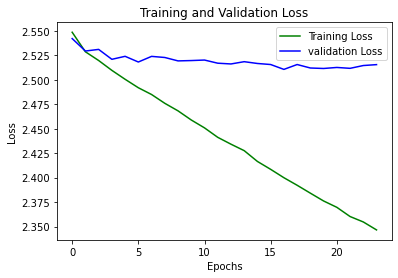

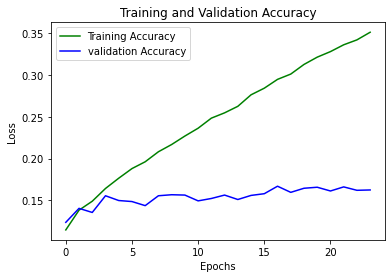

In [22]:
# HINT: note that your training time should not take many days.

# TODO:
# Pick your hyper parameters
max_epoch = 700

train_batch = 32
test_batch = 8

learning_rate = 0.0001
model = ConvNet()
criterion = nn.CrossEntropyLoss()    
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=5e-04) # you can play with  weight_decay as well
train_on_gpu = torch.cuda.is_available()


save_file_name = 'convnet.pt'

# Create train dataset loader
# Create validation dataset loader
# Create test dataset loader
train_loader, validate_loader, test_loader = get_dataset("data/", 2)

# initialize your network
dataloaders = {
    'train': DataLoader(train_loader, batch_size=train_batch, shuffle=True),
    'val': DataLoader(validate_loader, batch_size=16, shuffle=True),
    'test': DataLoader(test_loader, batch_size=test_batch, shuffle=True)
}

if train_on_gpu:
    model = model.to('cuda')

no_improvement_stop = 7
train_loader = dataloaders['train']
valid_loader = dataloaders['val']
# Early stopping intialization
no_improve = 0
valid_loss_min = np.Inf
best_epoch4 = 0
valid_max_acc = 0
results = []

# Main loop
for epoch in range(max_epoch):

    train_loss = 0.0
    valid_loss = 0.0

    train_acc = 0
    valid_acc = 0

    model.train()
    for data, target in train_loader:

        data = data.float()
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * data.size(0)

        _, pred = torch.max(output, dim=1)
        correct_tensor = pred.eq(target.data.view_as(pred))
        accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
        train_acc += accuracy.item() * data.size(0)

    # After training loops ends, start validation
    else:
        
        with torch.no_grad():
            
            model.eval()

            for data, target in valid_loader:
                data = data.float()
                # Tensors to gpu
                if train_on_gpu:
                    data, target = data.cuda(), target.cuda()


                output = model(data)

                loss = criterion(output, target)
                valid_loss += loss.item() * data.size(0)

                _, pred = torch.max(output, dim=1)
                correct_tensor = pred.eq(target.data.view_as(pred))
                accuracy = torch.mean(
                    correct_tensor.type(torch.FloatTensor))
                valid_acc += accuracy.item() * data.size(0)


            valid_loss = valid_loss / len(valid_loader.dataset)

            results.append([train_loss / len(train_loader.dataset), valid_loss, train_acc / len(train_loader.dataset), valid_acc / len(valid_loader.dataset)])



            print('Epoch: ' + str(epoch) + ' Training Loss: ' + str(results[epoch][0]) + ' Validation Loss: ' + str(results[epoch][1]))
            print('Training Accuracy: ' + str(100 * results[epoch][2]) + '% Validation Accuracy: ' + str(100 * results[epoch][3]) + '%')
            print('')

            if valid_loss < valid_loss_min:
                torch.save(model.state_dict(), save_file_name)
                no_improve = 0
                valid_loss_min = valid_loss

            else:
                no_improve += 1
                if no_improve >= no_improvement_stop:
                    print("No increment in validation thus stop")
                    best_model_conv = model.load_state_dict(torch.load(save_file_name))
                    break


# Attach the optimizer
model.optimizer = optimizer
best_epoch4 = best_epoch

# plot losses vs epoch 
train_loss = np.zeros((len(results)), dtype=float)
valid_loss = np.zeros((len(results)), dtype=float)
train_acc = np.zeros((len(results)), dtype=float)
valid_acc = np.zeros((len(results)), dtype=float)
for i in range(len(results)):
    train_loss[i] = results[i][0]
    valid_loss[i] = results[i][1]
    train_acc[i] = results[i][2]
    valid_acc[i] = results[i][3]
epochs = range(0, epoch + 1)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, valid_loss, 'b', label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# plot accuracies vs epoch
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, valid_acc, 'b', label='validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



####Test with ADAM [15 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Then, discuss figures that you have plotted in the previous section, your test results and algorithm complexity with maximum 200 words. Compare two **optimizers**. Which one is more preferable? Why?

**Explanation** <br>
SGD is mainly gradient descent. Difference is that it does not perform computations on the whole dataset. SGD only computes on a small subset. and produces the same performance as regular gradient descent when the learning rate is low. On Contrary, Adam is different than regular gradient descent, regular gradient descent maintains a single learning rate  for all weight updates and the learning rate does not change during training. On the otherhand, Adam computes adaptive learning rates for different parameters from estimates of first and second moments of the gradients. This main chance in the learning rate make it useful for large  data and parameters. Also, it requires little tuning before the trainig.

In [ ]:
# Test MLP
# load best model
# best_path = "/content/drive/My Drive/.../best_mlp_adam.pth"
# model = torch.load(best_path)



# evaluate on test set
# model = model.eval()

# with torch.no_grad():
#   iterate over test batches
#   get confusion matrix
#   calculate accuracy
#   calculate precision
#   calculate recall
#   calculate F1 score

# print metrics
# print("Mean Loss:", losses, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
# fig, ax = plt.subplots()
# im = ax.imshow(conf_matrix)
# We want to show all ticks...
# ax.set_xticks(np.arange(15))
# ax.set_yticks(np.arange(15))

# fig.tight_layout()
# plt.show()

In [32]:
# Test CNN
# load best model
# best_path = "/content/drive/My Drive/.../best_cnn_adam.pth"
# model = torch.load(best_path)


best_path = 'convnet.pt'
test_loader = dataloaders['test'] 
test_loss = 0
accuracy = 0

model = ConvNet()
model.load_state_dict(torch.load(save_file_name))
model.eval()

print(model)
test_loss = 0
accuracy = 0
acc = []
# with torch.no_grad():
with torch.no_grad():
    print("Enters ")
    iteration = 0
    #   iterate over test batches
    for inputs, labels in test_loader:
        if train_on_gpu:
            inputs, labels = data.cuda(), target.cuda()
        logps = model(inputs)
        test_loss += criterion(logps, labels)

        # Calculate accuracy
        ps = torch.exp(logps)
        top_p, top_class = ps.topk(1, dim=1)
        #print(top_p)
        #print(len(test_loader.dataset))
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
        acc.append(torch.mean(equals.type(torch.FloatTensor)).item())
        iteration += 1
        print(accuracy)
print(f"Test loss: {test_loss/iteration:.3f}.. ")
print("Test Accuracy:" + str(100 * accuracy / iteration) + ' %')

# evaluate on test set
# model = model.eval()

# with torch.no_grad():
#   iterate over test batches
#   get confusion matrix
#   calculate accuracy
#   calculate precision
#   calculate recall
#   calculate F1 score

# print metrics
# print("Mean Loss:", losses, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
# fig, ax = plt.subplots()
# im = ax.imshow(conf_matrix)
# We want to show all ticks...
# ax.set_xticks(np.arange(15))
# ax.set_yticks(np.arange(15))

# fig.tight_layout()
# plt.show()

ConvNet(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1568, out_features=13, bias=True)
  (softmax): Softmax(dim=1)
)
Enters 


RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same